In [174]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils as torch_utils
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Below is some data I collected from houses in Elmhurst, Illinois.

In [175]:
training_data_raw = {
    'price': [330000.0, 347000.0, 1249900.0, 339900.0, 750000.0, 379000.0,409900.0],
    'sqrfoot': [1125.0, 802.0, 3734.0, 1300.0, 4200.0, 1100.0, 1767.0],
    'miles_to_school': [3.0, 1.6, 2.2, 2.6, 0.6, 5.0, 2.1],
    'yearbuilt': [1954.0, 1925.0, 2006.0, 1950.0, 1930.0, 1960.0, 1950.0]
}

training_df = pd.DataFrame(data=training_data_raw)
X = torch.tensor(training_df[['sqrfoot', 'miles_to_school', 'yearbuilt']].values, dtype=torch.float32)
Y = torch.tensor(training_df[['price']].values, dtype=torch.float32)
Y.transpose

print(f"X: {X}")
print(f"\nY: {Y}")

X: tensor([[1.1250e+03, 3.0000e+00, 1.9540e+03],
        [8.0200e+02, 1.6000e+00, 1.9250e+03],
        [3.7340e+03, 2.2000e+00, 2.0060e+03],
        [1.3000e+03, 2.6000e+00, 1.9500e+03],
        [4.2000e+03, 6.0000e-01, 1.9300e+03],
        [1.1000e+03, 5.0000e+00, 1.9600e+03],
        [1.7670e+03, 2.1000e+00, 1.9500e+03]])

Y: tensor([[ 330000.],
        [ 347000.],
        [1249900.],
        [ 339900.],
        [ 750000.],
        [ 379000.],
        [ 409900.]])


Creating the model.

In [281]:
class LinearModel(nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.input = nn.Linear(3, 64)
        self.hidden1=nn.Linear(64,32)
        self.output=nn.Linear(32,1)

    def forward(self, x):
        x = torch.relu(self.input(x))  # Apply ReLU activation to the output of the first hidden layer
        x = torch.relu(self.hidden1(x))  # Apply ReLU activation to the output of the second hidden layer
        return self.output(x)
    
model = LinearModel()

In [282]:
loss_function = nn.MSELoss()

learning_rate = 0.0001
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=.09)

Below is the training loop:

In [320]:
loss_array = []

num_epochs = 500000
for epoch in range(num_epochs):
    optimizer.zero_grad()

    predictions = model(X)

    loss = loss_function(predictions, Y)
    loss_array.append((loss.item()))

    loss.backward()

    torch_utils.clip_grad_norm_(model.parameters(), max_norm=1.0)

    optimizer.step()

    if (epoch + 1) % 5000 == 0:
        print(f"Epoch: {epoch+1}, Loss: {loss.item():.4f}")

print(f"initial: {loss_array[0]}")
print(f"new: {loss_array[-1]}")

Epoch: 5000, Loss: 9149220864.0000
Epoch: 10000, Loss: 8942748672.0000
Epoch: 15000, Loss: 8736580608.0000
Epoch: 20000, Loss: 8531129344.0000
Epoch: 25000, Loss: 8329858560.0000
Epoch: 30000, Loss: 8128295424.0000
Epoch: 35000, Loss: 7926868480.0000
Epoch: 40000, Loss: 7727467520.0000
Epoch: 45000, Loss: 7529108992.0000
Epoch: 50000, Loss: 7332015104.0000
Epoch: 55000, Loss: 7137639424.0000
Epoch: 60000, Loss: 6942171136.0000
Epoch: 65000, Loss: 6748877824.0000
Epoch: 70000, Loss: 6557344256.0000
Epoch: 75000, Loss: 6367776768.0000
Epoch: 80000, Loss: 6180286464.0000
Epoch: 85000, Loss: 5993542144.0000
Epoch: 90000, Loss: 5806836736.0000
Epoch: 95000, Loss: 5623021056.0000
Epoch: 100000, Loss: 5440860672.0000
Epoch: 105000, Loss: 5260917248.0000
Epoch: 110000, Loss: 5083209728.0000
Epoch: 115000, Loss: 4906998784.0000
Epoch: 120000, Loss: 4734087680.0000
Epoch: 125000, Loss: 4562255360.0000
Epoch: 130000, Loss: 4393062400.0000
Epoch: 135000, Loss: 4226488064.0000
Epoch: 140000, Loss: 

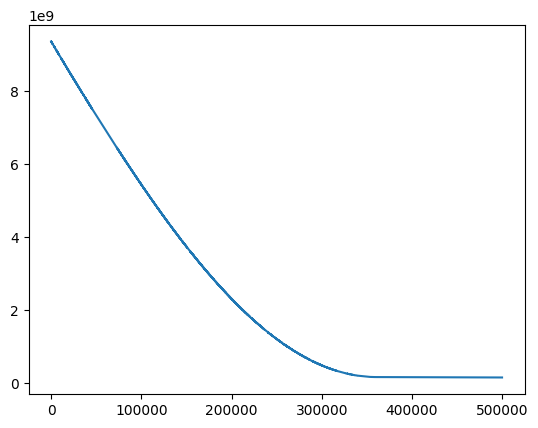

In [321]:

epochs_array = []
for i in range(num_epochs):
    epochs_array.append(i)
plt.plot(epochs_array, loss_array)
plt.show()

In [324]:
input = torch.tensor([[1567, 2.9, 1962]], dtype=torch.float32)
print(f"input tensor: {input}")

output = model(input)
#input is a tensor of sqrtfoot, miles to school, yearbuilt
print(f"Predicted price: ${output.item():.2f}")
# answer = 490000
answer = torch.tensor([[490000]], dtype=torch.float32)
print(f"off by: ${(output.item()-answer.item()):.4f}")

input tensor: tensor([[1567.0000,    2.9000, 1962.0000]])
Predicted price: $338577.31
off by: $-151422.6875


In [325]:
answer = torch.tensor([[459900]], dtype=torch.float32)
input = torch.tensor([[1409, 1.9, 1567]])

output = model(input)
print(output.item())
print(f"off by: ${(output.item()-answer.item()):.4f}")

324844.375
off by: $-135055.6250


In [326]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())


print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
input.weight 	 torch.Size([64, 3])
input.bias 	 torch.Size([64])
hidden1.weight 	 torch.Size([32, 64])
hidden1.bias 	 torch.Size([32])
output.weight 	 torch.Size([1, 32])
output.bias 	 torch.Size([1])
Optimizer's state_dict:
state 	 {0: {'momentum_buffer': tensor([[-5.6838e-03, -3.3558e-06, -3.7191e-03],
        [-1.1603e-02, -2.7890e-03, -1.4704e-02],
        [-6.2094e-02, -1.5030e-02, -7.7098e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-4.4011e-02, -1.0739e-02, -5.4347e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-3.1134e-02, -5.8107e-03, -3.4372e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [-7.6727e-02, -1.4751e-02, -8.2541e-02],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 2.1136e-01,  7.5230e-02,  3.3287e-01],
        [-2.4092e-02, -1.1967e-02, -4

In [329]:
PATH = "house_prices_ai.pth"
torch.save(model.state_dict(), PATH)